In [1]:
import xgboost
import jaxgboost

import time
import matplotlib.pyplot as plt

from sklearn import datasets, metrics

In [2]:
data = datasets.load_diabetes()
x = data['data']
y = data['target'].reshape(-1, 1)
print(x.shape, y.shape)

(442, 10) (442, 1)


In [3]:
model_xgboost = xgboost.XGBRegressor(n_estimators=20, max_depth=4, tree_method="exact", base_score=y.mean())
model_xgboost.fit(x, y)
p_xgboost = model_xgboost.predict(x)

In [4]:
model_jaxgboost = jaxgboost.JAXGBoostModel(n_estimators=20, max_depth=4, learning_rate=0.3, base_score=y.mean())
model_jaxgboost.fit(x, y)
p_jaxgboost = model_jaxgboost.predict(x)

xgboost rmse = 30.023763
jaxgboost rmse = 30.023763


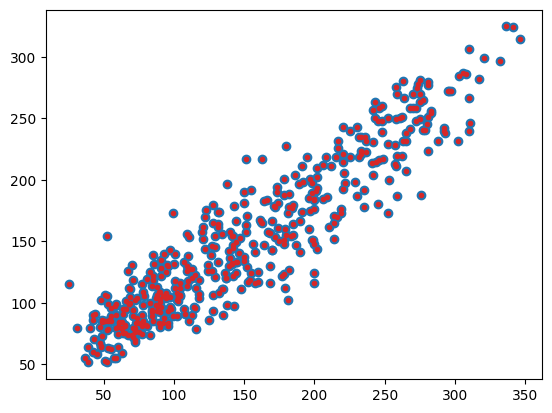

In [5]:
plt.scatter(y, p_xgboost, color='tab:blue', marker="o")
plt.scatter(y, p_jaxgboost, color='tab:red', marker=".")

print("xgboost rmse = %.6f" % metrics.root_mean_squared_error(y, p_xgboost))
print("jaxgboost rmse = %.6f" % metrics.root_mean_squared_error(y, p_jaxgboost))